<font size = 30px>EDA on Boston Housing Dataset</font>

<div class="alert alert-block alert-info" style="border-left: 5px solid #2196F3;">
<h2 style="color: #2196F3;">Project Tasks:</h2>

**Task 1:** Familiarize yourself with the dataset.

**Task 2:** Load the dataset in a Jupyter Notebook.

**Task 3:** Generate basic statistics and visualizations for upper management.

**Task 4:** Use the appropriate tests to answer the questions provided.

</div>


# **Task 1**: ***Familiarize yourself with the dataset***.

## Introduction

In this Jupyter Notebook, we will perform an exploratory data analysis (EDA) on the Boston Housing Dataset. This dataset contains various features related to housing in different towns in Boston, Massachusetts. Each row represents a different town, and the dataset includes information such as crime rate, property tax rate, and median home values.

## Dataset Description

The dataset consists of the following columns:

- **CRIM**: Per capita crime rate by town.
- **ZN**: Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS**: Proportion of non-retail business acres per town.
- **CHAS**: Charles River dummy variable (1 if tract bounds river; 0 otherwise).
- **NOX**: Nitric oxides concentration (parts per 10 million).
- **RM**: Average number of rooms per dwelling.
- **AGE**: Proportion of owner-occupied units built prior to 1940.
- **DIS**: Weighted distances to five Boston employment centers.
- **RAD**: Index of accessibility to radial highways.
- **TAX**: Full-value property-tax rate per $10,000.

- **PTRATIO**: Pupil-teacher ratio by town.
- **LSTAT**: Percentage of lower status of the population.
- **MEDV**: Median value of owner-occupied homes in $1000's.

## Analysis Objectives

We will explore and analyze this dataset to answer several questions and uncover insights:

1. Is there a significant difference in the median value of houses bounded by the Charles river or not?
2. Is there a difference in Median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE)?
3. Can we conclude that there is no relationship between nitric oxide concentrations and the proportion of non-retail business acres per town?
4. What is the impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes?

We will use various statistical tests, visualizations, and regression analysis to address these questions.

### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [8]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# **Task 2**: ***Load the dataset in a Jupyter Notebook.***

## Downloading the dataset in the csv file from the URL

In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

## Read the dataset in the csv file from the URL

In [4]:
data=pd.read_csv(boston_url)
data.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# **Task 3:** ***Generate basic statistics and visualizations for upper management.***

## Descriptive statistics 

In [5]:
# Generate descriptive statistics
statistics = data.describe()
print(statistics)

       Unnamed: 0        CRIM          ZN       INDUS        CHAS         NOX  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   252.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      0.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    126.250000    0.082045    0.000000    5.190000    0.000000    0.449000   
50%    252.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%    378.750000    3.677083   12.500000   18.100000    0.000000    0.624000   
max    505.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               RM         AGE         DIS         RAD         TAX     PTRATIO  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.284634   68.574901    3.795043    9.549407  408.237154   18.455534   
std      0.702617   28.1488

## Visualisation

### 1. Boxplot for "Median value of owner-occupied homes (MEDV)"

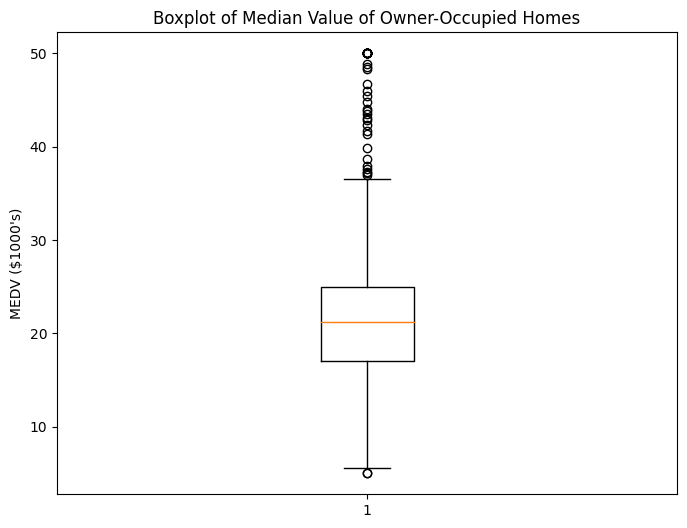

In [9]:
# Create a boxplot for MEDV
plt.figure(figsize=(8, 6))
plt.boxplot(data["MEDV"])
plt.title("Boxplot of Median Value of Owner-Occupied Homes")
plt.ylabel("MEDV ($1000's)")
plt.show()

### 2. Bar Plot for "Charles River Variable (CHAS)"

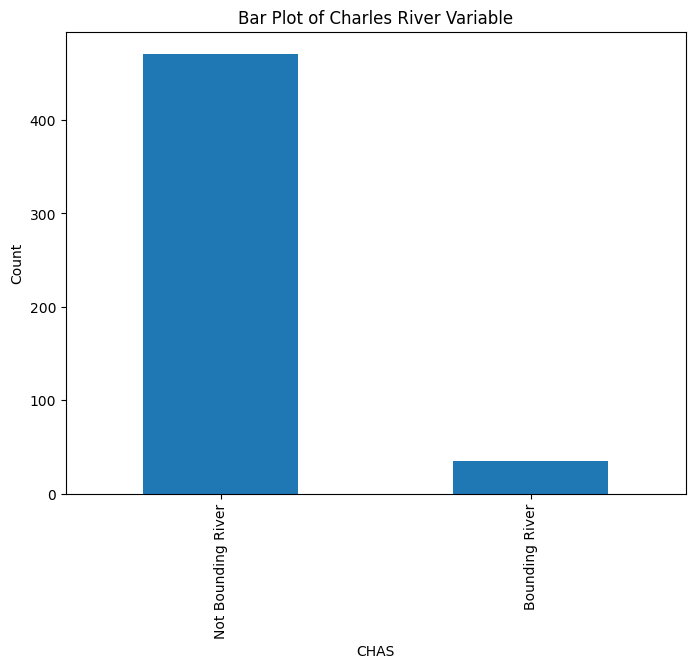

In [10]:
# Create a bar plot for CHAS
plt.figure(figsize=(8, 6))
data["CHAS"].value_counts().plot(kind="bar")
plt.title("Bar Plot of Charles River Variable")
plt.xlabel("CHAS")
plt.ylabel("Count")
plt.xticks([0, 1], ['Not Bounding River', 'Bounding River'])
plt.show()

### 3. Boxplot for "MEDV" vs. "AGE" Discretized

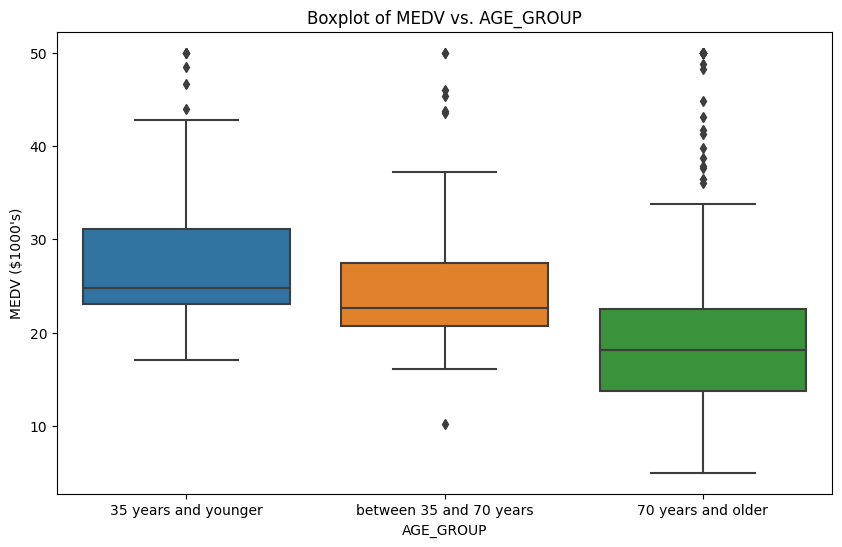

In [11]:
# Discretize AGE into three groups
bins = [0, 35, 70, float('inf')]
labels = ["35 years and younger", "between 35 and 70 years", "70 years and older"]
data['AGE_GROUP'] = pd.cut(data['AGE'], bins=bins, labels=labels)

# Create a boxplot for MEDV vs. AGE_GROUP
plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=data)
plt.title("Boxplot of MEDV vs. AGE_GROUP")
plt.xlabel("AGE_GROUP")
plt.ylabel("MEDV ($1000's)")
plt.show()

### 4. Scatter Plot for Nitric Oxide Concentrations (NOX) vs. Non-Retail Business Proportion (INDUS)

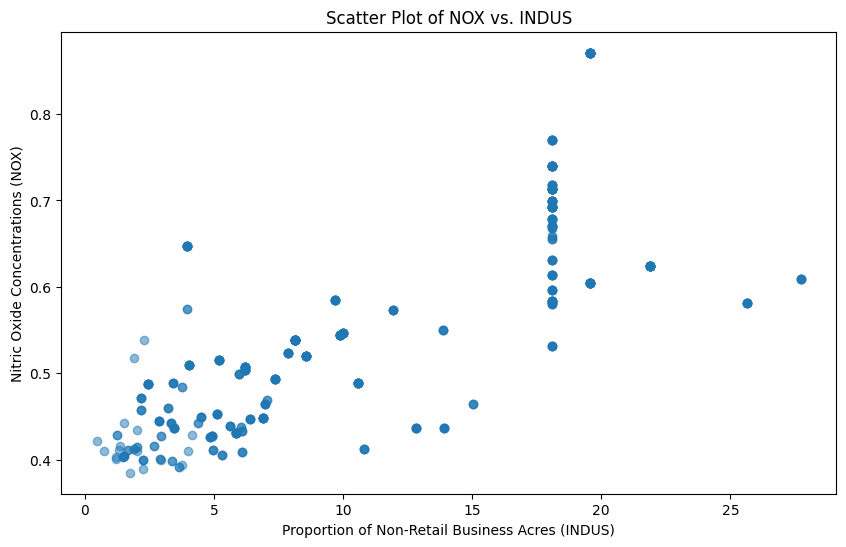

In [12]:
# Create a scatter plot for NOX vs. INDUS
plt.figure(figsize=(10, 6))
plt.scatter(data["INDUS"], data["NOX"], alpha=0.5)
plt.title("Scatter Plot of NOX vs. INDUS")
plt.xlabel("Proportion of Non-Retail Business Acres (INDUS)")
plt.ylabel("Nitric Oxide Concentrations (NOX)")
plt.show()

### 5. Histogram for "Pupil to Teacher Ratio (PTRATIO)"

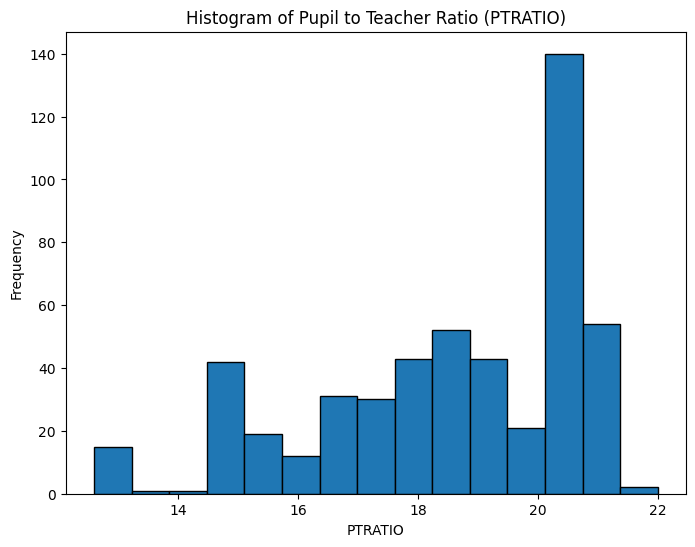

In [13]:
# Create a histogram for PTRATIO
plt.figure(figsize=(8, 6))
plt.hist(data["PTRATIO"], bins=15, edgecolor='k')
plt.title("Histogram of Pupil to Teacher Ratio (PTRATIO)")
plt.xlabel("PTRATIO")
plt.ylabel("Frequency")
plt.show()

# **Task 4:** ***Use the appropriate tests to answer the questions provided.***

**1. Is there a significant difference in the median value of houses bounded by the Charles river or not? (T-test for independent samples)**

**Hypothesis:**

- Null Hypothesis (H0): There is no significant difference in the median values of houses bounded by the Charles river and those not bounded by the Charles river.
- Alternative Hypothesis (H1): There is a significant difference in the median values of houses bounded by the Charles river and those not bounded by the Charles river.


In [14]:
import scipy.stats as stats

# Separate data into two groups: Charles River (CHAS=1) and Non-Charles River (CHAS=0)
charles_river = data[data['CHAS'] == 1]['MEDV']
non_charles_river = data[data['CHAS'] == 0]['MEDV']

# Perform a t-test for independent samples
t_statistic, p_value = stats.ttest_ind(charles_river, non_charles_river)

alpha = 0.05

# Check the p-value against alpha
if p_value < alpha:
    print("Reject the null hypothesis")
    print("There is a significant difference in median values.")
else:
    print("Fail to reject the null hypothesis")
    print("There is no significant difference in median values.")

Reject the null hypothesis
There is a significant difference in median values.


**2. Is there a difference in Median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE)? (ANOVA)**

**Hypothesis:**

- Null Hypothesis (H0): There is no significant difference in median values of houses among different age groups.
- Alternative Hypothesis (H1): There is a significant difference in median values of houses among different age groups.

In [15]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform ANOVA
model = ols('MEDV ~ AGE_GROUP', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

alpha = 0.05

# Check the p-value against alpha
if anova_table['PR(>F)'][0] < alpha:
    print("Reject the null hypothesis")
    print("There is a significant difference in median values among different age groups.")
else:
    print("Fail to reject the null hypothesis")
    print("There is no significant difference in median values among different age groups.")

Reject the null hypothesis
There is a significant difference in median values among different age groups.


**3. Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town? (Pearson Correlation)**

**Hypothesis:**

- Null Hypothesis (H0): There is no significant relationship (correlation) between nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).
- Alternative Hypothesis (H1): There is a significant relationship (correlation) between NOX and INDUS.

In [16]:
# Calculate Pearson correlation coefficient
correlation_coefficient, p_value = stats.pearsonr(data['NOX'], data['INDUS'])

alpha = 0.05

# Check the p-value against alpha
if p_value < alpha:
    print("Reject the null hypothesis")
    print("There is a significant relationship between NOX and INDUS.")
else:
    print("Fail to reject the null hypothesis")
    print("There is no significant relationship between NOX and INDUS.")

Reject the null hypothesis
There is a significant relationship between NOX and INDUS.


**4. What is the impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes? (Regression analysis)**

**Hypothesis:**

- Null Hypothesis (H0): An additional weighted distance to the five Boston employment centers has no impact on the median value of owner-occupied homes (β = 0).
- Alternative Hypothesis (H1): An additional weighted distance to the five Boston employment centers has an impact on the median value of owner-occupied homes (β ≠ 0).

In [17]:
import statsmodels.api as sm

# Perform regression analysis
X = data['DIS']  # Independent variable
X = sm.add_constant(X)  # Add a constant for the intercept
y = data['MEDV']  # Dependent variable

model = sm.OLS(y, X).fit()
summary = model.summary()

alpha = 0.05

# Check the p-value for the coefficient of DIS against alpha
if model.pvalues['DIS'] < alpha:
    print("Reject the null hypothesis")
    print("An additional weighted distance to the employment centers has an impact on median home value.")
else:
    print("Fail to reject the null hypothesis")
    print("There is no significant impact of an additional weighted distance on median home value.")

# Print the regression summary
print(summary)

Reject the null hypothesis
An additional weighted distance to the employment centers has an impact on median home value.
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           1.21e-08
Time:                        21:55:16   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------

These code snippets should help you perform the specified tests and draw conclusions based on the hypotheses and significance levels.